In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_main = pd.read_csv(r'task.csv')
print(df_main.info())
df_main


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105348 entries, 0 to 105347
Data columns (total 11 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           105348 non-null  int64  
 1   age                                  105348 non-null  int64  
 2   gender                               89793 non-null   object 
 3   language_group                       105348 non-null  object 
 4   preset_group                         105348 non-null  object 
 5   ad_interstitial_starts               105348 non-null  float64
 6   ad_rewarded_starts                   105348 non-null  float64
 7   retention_D1                         105348 non-null  int64  
 8   UsersQuestionRightAnswersPerAnswers  95496 non-null   float64
 9   revenue_interstitial_D0D3            82447 non-null   float64
 10  revenue_rewarded_D0D3                82315 non-null   float64
dtypes: float64(5)

,Unnamed: 0,age,gender,language_group,preset_group,ad_interstitial_starts,ad_rewarded_starts,retention_D1,UsersQuestionRightAnswersPerAnswers,revenue_interstitial_D0D3,revenue_rewarded_D0D3
0,0,7,NaN,android_fr,base,0.0,0.0,0,NaN,NaN,NaN
1,1,12,f,android_fr,base,3.0,0.0,0,96.153846,0.012230,0.000000
2,2,42,f,android_fr,base,20.0,0.0,1,93.670886,0.009349,0.000000
3,3,77,f,android_fr,base,10.0,8.0,0,91.250000,0.127331,0.081907
4,4,15,f,android_fr,base,0.0,0.0,0,91.666667,0.001250,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
105343,105343,9,f,android_turk,exp_2,2.0,0.0,0,74.625000,0.002674,0.000000
105344,105344,13,m,android_turk,exp_2,0.0,0.0,0,91.432432,0.011535,0.000000
105345,105345,14,f,android_turk,exp_2,0.0,0.0,0,99.500000,0.004353,NaN
105346,105346,99,m,android_turk,exp_2,9.0,0.0,0,99.500000,0.013654,0.052559


In [2]:
print(*df_main['gender'].unique())
print(*df_main['language_group'].unique())
print(*df_main['preset_group'].unique())
print(*df_main['retention_D1'].unique())

print(df_main['UsersQuestionRightAnswersPerAnswers'].isna().sum())
print(df_main['revenue_interstitial_D0D3'].isna().sum())
print(df_main['revenue_rewarded_D0D3'].isna().sum())

nan f m o
android_fr android_turk
base exp_1 exp_2
0 1
9852
22901
23033


In [3]:
df_main_grouped = df_main.groupby(['preset_group', 'language_group'], as_index=False) \
                 .agg({'age': 'count',
                       'ad_interstitial_starts': 'sum', 
                       'ad_rewarded_starts': ['sum','mean', 'max'], 
                       'retention_D1': 'sum',
                       'UsersQuestionRightAnswersPerAnswers': ['mean','median'],
                       'revenue_interstitial_D0D3':['sum','mean','median', 'max'],
                       'revenue_rewarded_D0D3': ['sum','mean', 'max']})
df_main_grouped['retention_conv'] = round(df_main_grouped['retention_D1']['sum'] / 
                                          df_main_grouped['age']['count'] * 100, 2)
df_main_grouped

# Промежуточные выводы по эксперименту:
#     1) Для андройд пользователей во Франции и Турции по сравнению с базовой версией приложения в эксперименте
# были внесены какие-то изменения
    
#     2) В итоге исходя из сгруппированного датасета мы имеем для проверки 10 нулевых гипотез для Франции и Турции
       
#       H01_1 - Действительно ли уменьшились просмотры рекламы за награду?
#       H01_2 - Действительно ли увеличились просмотры рекламы за награду?

#       H02_1 - Действительно ли в первом эксперименте повышается количество вернувшихся в игру пользователей через 48ч?
#       H02_2 - Действительно ли во втором эксперименте понижается количество вернувшихся в игру пользователей через 48ч?


#       H03_1 - Действительно ли повысилась выручка с показа пользователю принудительной рекламы ?
#       H03_2 - Действительно ли понизилась выручка с показа пользователю принудительной рекламы ?
        
#       H04_1 - Действительно ли понизилась выручка с показа пользователю рекламы за награду ?
#       H04_2 - Действительно ли повысилась выручка с показа пользователю рекламы за награду ?

#       H05_1 - Действительно ли увеличилось количество принудительных показов рекламы?
#       H05_2 - Действительно ли уменьшилось количество принудительных показов рекламы?



preset_group language_group    age ad_interstitial_starts  \
                               count                    sum   
0         base     android_fr  22785               391956.0   
1         base   android_turk  12331               149547.0   
2        exp_1     android_fr  22785               429410.0   
3        exp_1   android_turk  12331               164585.0   
4        exp_2     android_fr  22785               347327.0   
5        exp_2   android_turk  12331               130851.0   

  ad_rewarded_starts                   retention_D1  \
                 sum      mean     max          sum   
0            83808.0  3.678209  2465.0         5063   
1            17483.0  1.417809   670.0         2703   
2            81795.0  3.589862  2218.0         5367   
3            13415.0  1.087909   356.0         2738   
4            97371.0  4.273469  3081.0         4739   
5            21691.0  1.759063   837.0         2539   

  UsersQuestionRightAnswersPerAnswers            revenue_interstitial_D0D3  \
                                 mean     median                       sum   
0                           86.349739  90.909091               1455.169189   
1                           90.706660  93.442623                189.702825   
2                           86.348151  90.796912               1572.706551   
3                           90.751832  93.548387                207.143577   
4                           85.992081  90.454545               1383.193043   
5                           90.507734  93.202532                182.231675   

                                revenue_rewarded_D0D3                      \
       mean    median       max                   sum      mean       max   
0  0.082283  0.021474  9.927303            340.244134  0.019239  4.210137   
1  0.019515  0.008191  2.271105             31.331391  0.003223  0.614110   
2  0.088728  0.023283  7.410669            338.576736  0.019024  3.936398   
3  0.021079  0.009090  2.498216             30.102082  0.003104  0.583404   
4  0.078164  0.020497  9.165341            407.301310  0.023005  5.052164   
5  0.018608  0.007706  2.157550             39.995262  0.004119  0.736932   

  retention_conv  
                  
0          22.22  
1          21.92  
2          23.55  
3          22.20  
4          20.80  
5          20.59

In [4]:
df_main_grouped_gender = df_main[(df_main['gender'] == 'm') | (df_main['gender'] == 'f')]


df_main_grouped_gender = df_main_grouped_gender.groupby(['preset_group', 'language_group', 'gender'], as_index=False) \
                 .agg({'age': 'count',
                       'ad_interstitial_starts': 'sum', 
                       'ad_rewarded_starts': ['sum','mean', 'max'], 
                       'retention_D1': 'sum',
                       'UsersQuestionRightAnswersPerAnswers': ['mean','median'],
                       'revenue_interstitial_D0D3':['sum','mean','median', 'max'],
                       'revenue_rewarded_D0D3': ['sum','mean', 'max']})
df_main_grouped_gender['retention_conv'] = round(df_main_grouped_gender['retention_D1']['sum'] / 
                                          df_main_grouped_gender['age']['count'] * 100, 2)
df_main_grouped_gender

# Судя по данным сегментация по полу излишняя, т.к не прослеживается логика по проведению эксперимента. 
# Например Что в 1, что во 2 м эксперименте количество принудительных показов француженкам было уменьшено, а французам
# в 1м эксперименте увеличино, во 2м уменьшено. Турчанкам количество принудительных показов француженкам было уменьшено,
# а туркам увеличино

# Но самое главное, то, что для французского сегмента размер base, exp_1, exp_2 выборок ровно по 22785 наблюдений,
# а для турецкого сегмента размер base, exp_1, exp_2 выборок ровно по 12331 наблюдений. Поэтому сегментация по полу
# в эксперименте судя по всему не планировалась


preset_group language_group gender    age ad_interstitial_starts  \
                                       count                    sum   
0          base     android_fr      f  10564               227333.0   
1          base     android_fr      m   8761               132962.0   
2          base   android_turk      f   4688                73785.0   
3          base   android_turk      m   5105                53678.0   
4         exp_1     android_fr      f  10603               197189.0   
5         exp_1     android_fr      m   8722               172630.0   
6         exp_1   android_turk      f   4660                62582.0   
7         exp_1   android_turk      m   5202                67971.0   
8         exp_2     android_fr      f  10590               165261.0   
9         exp_2     android_fr      m   8772               133408.0   
10        exp_2   android_turk      f   4647                46720.0   
11        exp_2   android_turk      m   5166                54562.0   

   ad_rewarded_starts                   retention_D1  \
                  sum      mean     max          sum   
0             47776.0  4.522529  2465.0         2703   
1             29024.0  3.312864   851.0         1869   
2              9285.0  1.980589   670.0         1203   
3              5976.0  1.170617   632.0         1090   
4             41438.0  3.908139  2218.0         2469   
5             27727.0  3.178973  1279.0         2108   
6              5444.0  1.168240   313.0         1012   
7              5610.0  1.078431   356.0         1147   
8             44447.0  4.197073  3081.0         2260   
9             38185.0  4.353055  3081.0         1797   
10             8401.0  1.807833   837.0          998   
11             9364.0  1.812621   495.0         1058   

   UsersQuestionRightAnswersPerAnswers            revenue_interstitial_D0D3  \
                                  mean     median                       sum   
0                            88.262156  91.387560                798.743171   
1                            85.860823  90.590608                558.811484   
2                            91.378202  94.005988                 75.070481   
3                            91.218222  93.750000                 89.775078   
4                            86.225052  90.625000                753.656022   
5                            86.444590  90.909091                588.757311   
6                            90.806870  93.442623                 81.893947   
7                            90.746987  93.693694                 85.510216   
8                            86.058693  90.454545                652.145867   
9                            85.971078  90.454545                501.343595   
10                           90.498262  93.333333                 61.587158   
11                           90.550977  93.103448                 81.426618   

                                 revenue_rewarded_D0D3                      \
        mean    median       max                   sum      mean       max   
0   0.089777  0.024676  6.102215            183.881490  0.020668  2.583015   
1   0.081853  0.020052  9.927303            133.266021  0.019520  4.210137   
2   0.019264  0.008512  1.160632             11.058282  0.002838  0.255117   
3   0.021743  0.008408  2.271105             16.865883  0.004085  0.614110   
4   0.091786  0.023053  7.410669            156.544409  0.018859  2.407197   
5   0.086544  0.023153  4.596295            128.752434  0.018901  3.936398   
6   0.022038  0.009159  1.428936             11.235750  0.003100  0.262944   
7   0.020650  0.008927  2.498216             11.941551  0.002905  0.410547   
8   0.079501  0.020560  9.165341            192.895350  0.023521  4.972292   
9   0.073446  0.019963  3.473000            151.315795  0.022233  5.052164   
10  0.016704  0.007548  1.102600             15.109818  0.004139  0.518586   
11  0.019992  0.007688  2.157550             16.693201  0.004100  0.736932   

   retention_conv  
   

В выборке 1 - 22785  В выборке 2 - 22785 записей


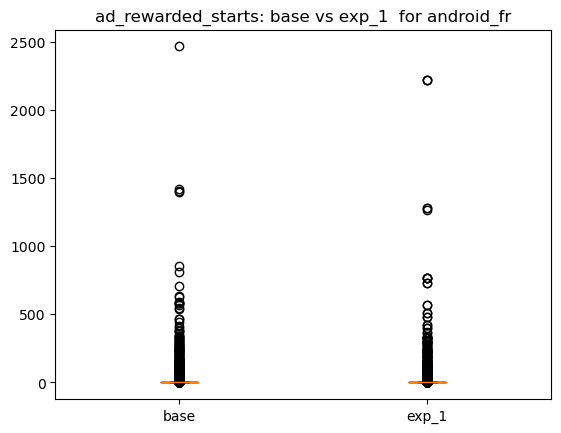

ad_rewarded_starts: base vs exp_1  for android_fr p_value= 0.785878084672469  ОСТАВЛЯЕМ H0

В выборке 1 - 12331  В выборке 2 - 12331 записей


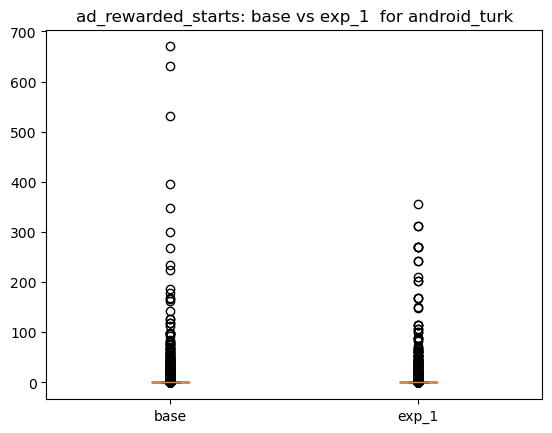

ad_rewarded_starts: base vs exp_1  for android_turk p_value= 0.02892837724681159  ОТКЛОНЯЕМ H0

В выборке 1 - 22785  В выборке 2 - 22785 записей


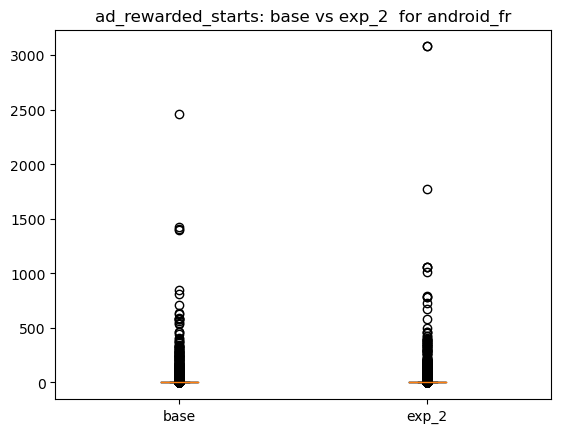

ad_rewarded_starts: base vs exp_2  for android_fr p_value= 0.08542252849448485  ОСТАВЛЯЕМ H0

В выборке 1 - 12331  В выборке 2 - 12331 записей


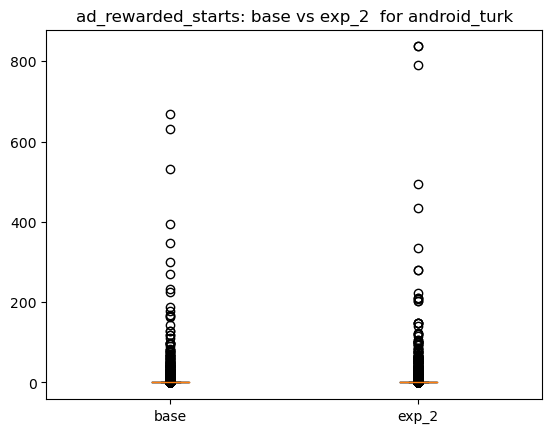

ad_rewarded_starts: base vs exp_2  for android_turk p_value= 0.08017743970423365  ОСТАВЛЯЕМ H0

В выборке 1 - 22785  В выборке 2 - 22785 записей


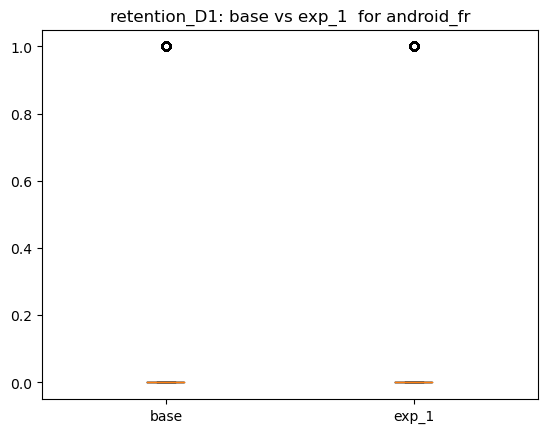

retention_D1: base vs exp_1  for android_fr p_value= 0.000699208211233294  ОТКЛОНЯЕМ H0

В выборке 1 - 12331  В выборке 2 - 12331 записей


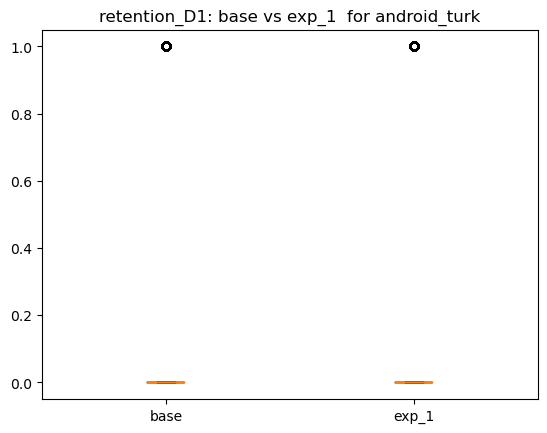

retention_D1: base vs exp_1  for android_turk p_value= 0.5909602065591016  ОСТАВЛЯЕМ H0

В выборке 1 - 22785  В выборке 2 - 22785 записей


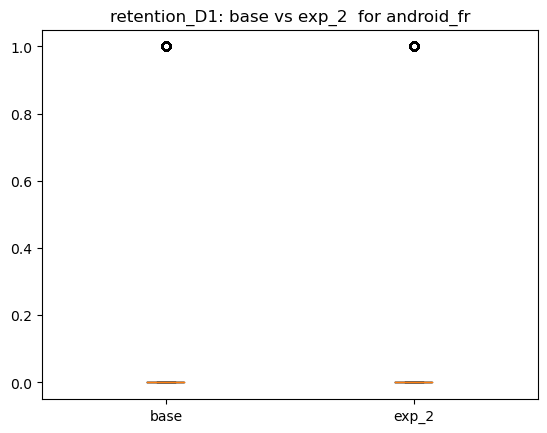

retention_D1: base vs exp_2  for android_fr p_value= 0.00022072753011679098  ОТКЛОНЯЕМ H0

В выборке 1 - 12331  В выборке 2 - 12331 записей


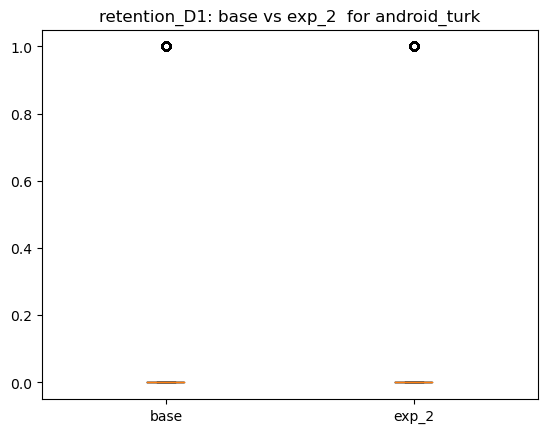

retention_D1: base vs exp_2  for android_turk p_value= 0.010690636437678466  ОТКЛОНЯЕМ H0

В выборке 1 - 17685  В выборке 2 - 17725 записей


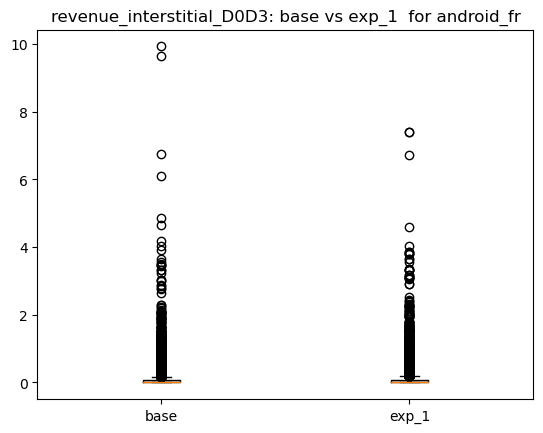

revenue_interstitial_D0D3: base vs exp_1  for android_fr p_value= 0.01255695427838971  ОТКЛОНЯЕМ H0

В выборке 1 - 9721  В выборке 2 - 9827 записей


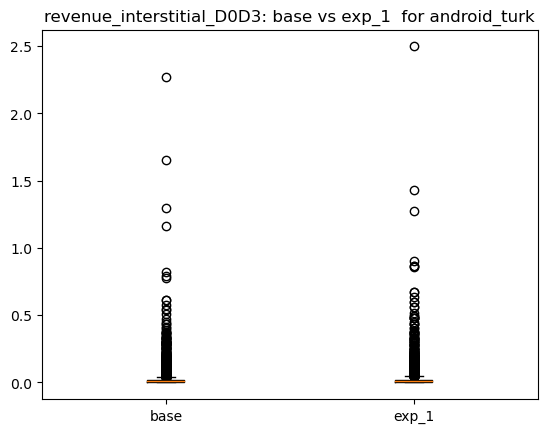

revenue_interstitial_D0D3: base vs exp_1  for android_turk p_value= 0.0362197693423812  ОТКЛОНЯЕМ H0

В выборке 1 - 17685  В выборке 2 - 17696 записей


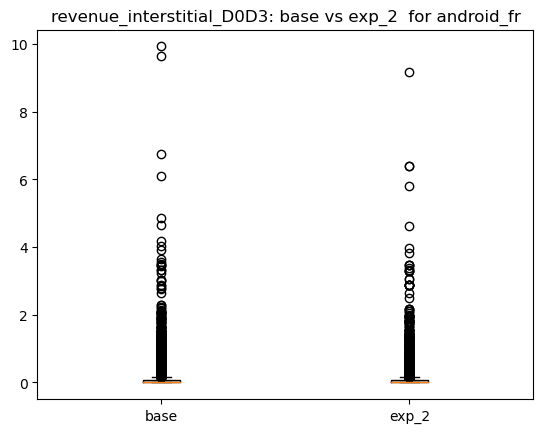

revenue_interstitial_D0D3: base vs exp_2  for android_fr p_value= 0.09719770482269328  ОСТАВЛЯЕМ H0

В выборке 1 - 9721  В выборке 2 - 9793 записей


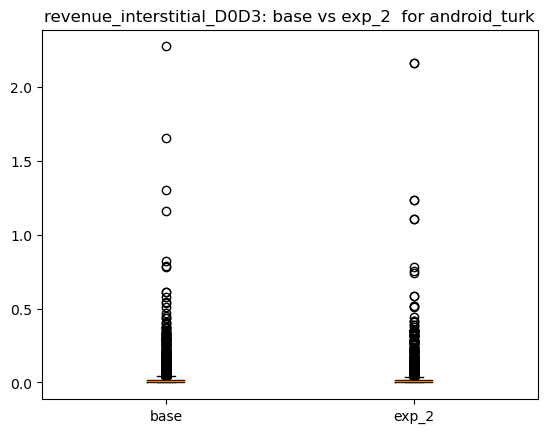

revenue_interstitial_D0D3: base vs exp_2  for android_turk p_value= 0.2271855343445087  ОСТАВЛЯЕМ H0

В выборке 1 - 17685  В выборке 2 - 17797 записей


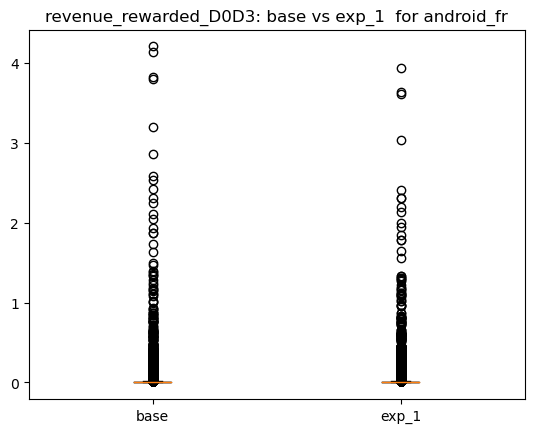

revenue_rewarded_D0D3: base vs exp_1  for android_fr p_value= 0.8513994711968356  ОСТАВЛЯЕМ H0

В выборке 1 - 9721  В выборке 2 - 9697 записей


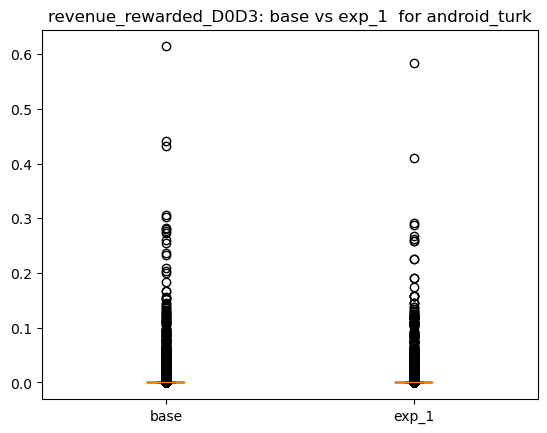

revenue_rewarded_D0D3: base vs exp_1  for android_turk p_value= 0.6181816611509019  ОСТАВЛЯЕМ H0

В выборке 1 - 17685  В выборке 2 - 17705 записей


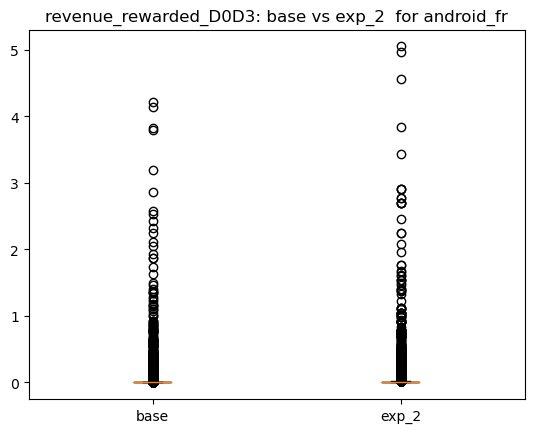

revenue_rewarded_D0D3: base vs exp_2  for android_fr p_value= 0.00409306368658652  ОТКЛОНЯЕМ H0

В выборке 1 - 9721  В выборке 2 - 9710 записей


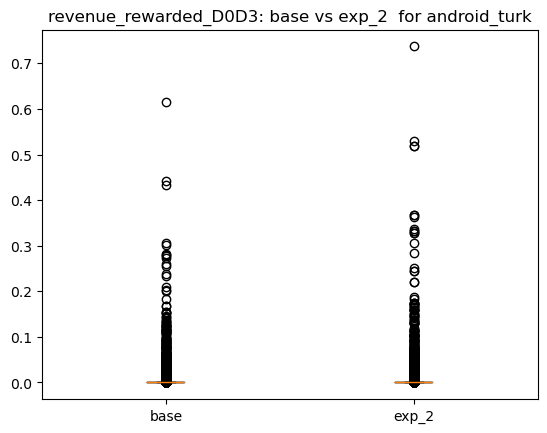

revenue_rewarded_D0D3: base vs exp_2  for android_turk p_value= 0.0014581296297610726  ОТКЛОНЯЕМ H0

В выборке 1 - 20504  В выборке 2 - 20484 записей


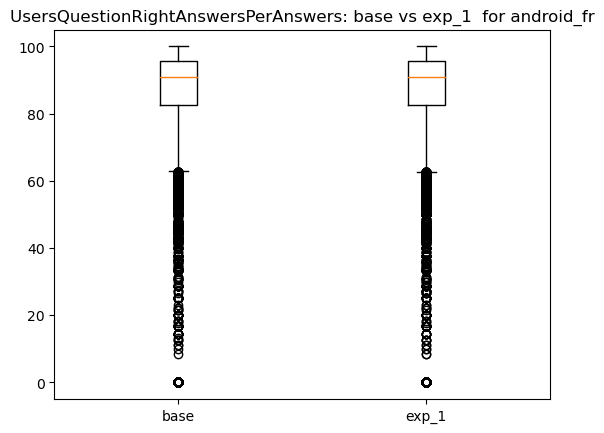

UsersQuestionRightAnswersPerAnswers: base vs exp_1  for android_fr p_value= 0.991520994670958  ОСТАВЛЯЕМ H0

В выборке 1 - 11337  В выборке 2 - 11391 записей


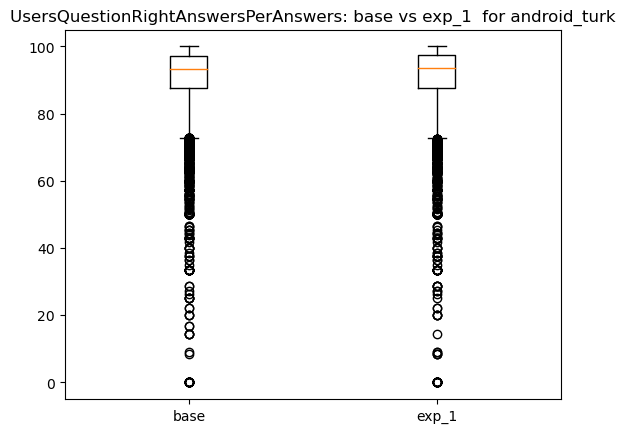

UsersQuestionRightAnswersPerAnswers: base vs exp_1  for android_turk p_value= 0.7510585665685849  ОСТАВЛЯЕМ H0

В выборке 1 - 20504  В выборке 2 - 20482 записей


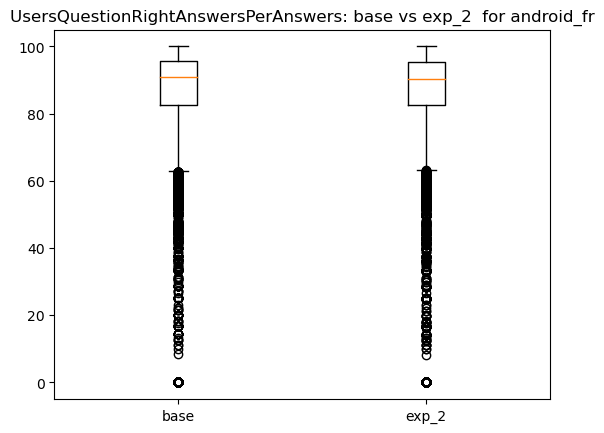

UsersQuestionRightAnswersPerAnswers: base vs exp_2  for android_fr p_value= 0.01748353221361132  ОТКЛОНЯЕМ H0

В выборке 1 - 11337  В выборке 2 - 11298 записей


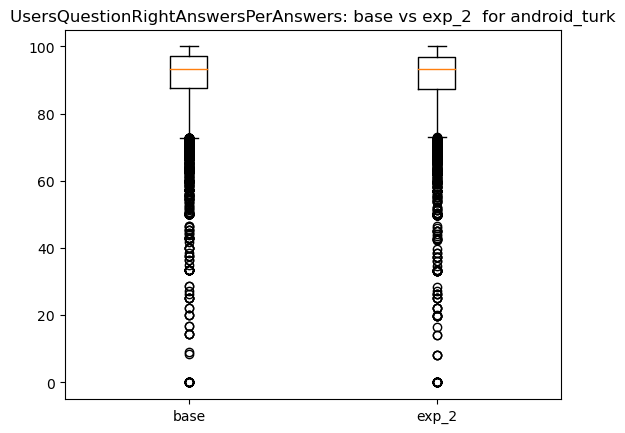

UsersQuestionRightAnswersPerAnswers: base vs exp_2  for android_turk p_value= 0.15797026779892104  ОСТАВЛЯЕМ H0

В выборке 1 - 22785  В выборке 2 - 22785 записей


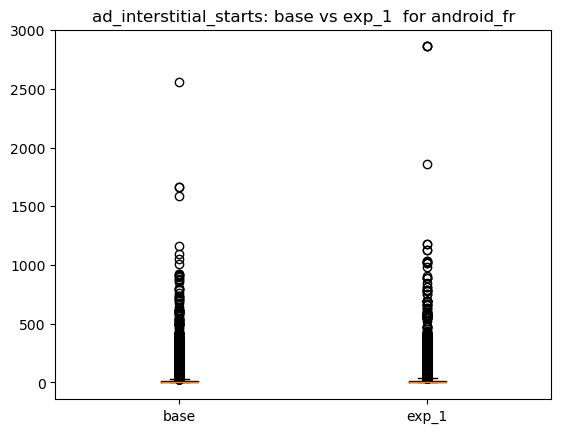

ad_interstitial_starts: base vs exp_1  for android_fr p_value= 0.0036472115052341666  ОТКЛОНЯЕМ H0

В выборке 1 - 12331  В выборке 2 - 12331 записей


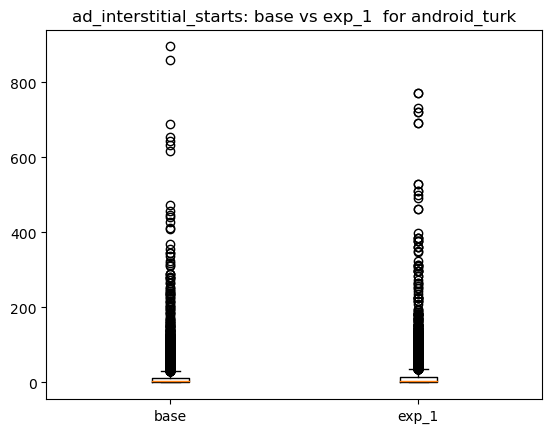

ad_interstitial_starts: base vs exp_1  for android_turk p_value= 0.0031357411924434037  ОТКЛОНЯЕМ H0

В выборке 1 - 22785  В выборке 2 - 22785 записей


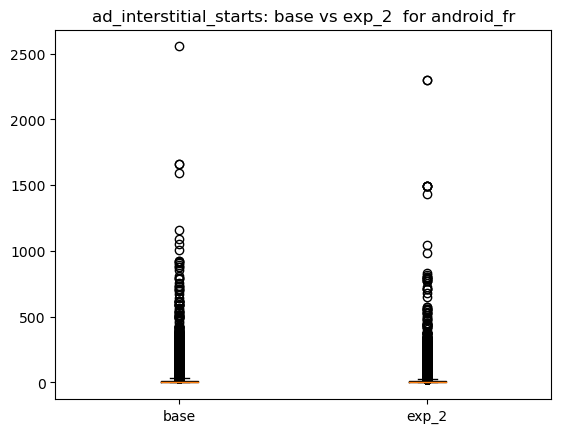

ad_interstitial_starts: base vs exp_2  for android_fr p_value= 0.00013122261518611842  ОТКЛОНЯЕМ H0

В выборке 1 - 12331  В выборке 2 - 12331 записей


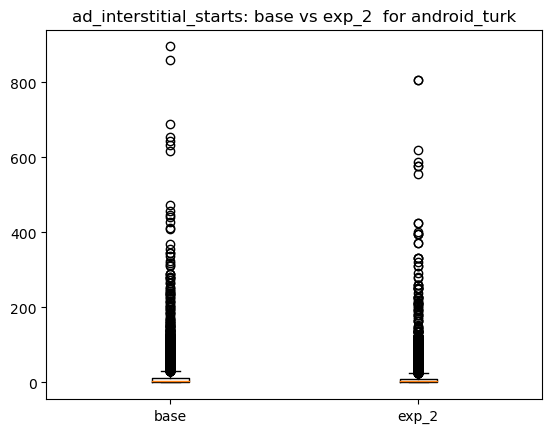

ad_interstitial_starts: base vs exp_2  for android_turk p_value= 5.273690819684089e-05  ОТКЛОНЯЕМ H0



In [5]:
import scipy.stats as stats

exp_list = ['exp_1', 'exp_2']
lang_list = ['android_fr', 'android_turk']
metric_list = ['ad_rewarded_starts', 
               'retention_D1',
               'revenue_interstitial_D0D3',
               'revenue_rewarded_D0D3',
               'UsersQuestionRightAnswersPerAnswers',
               'ad_interstitial_starts']

# Проверка UsersQuestionRightAnswersPerAnswers просто на всякий случай, возможно в каком то эксперименте слишком сложные
# вопросы, хотя по средним и медианным значением этой метрики перекосов не наблюдается, они близки

alpha = 0.05

for metric in metric_list:
    for experiment in exp_list:
        for lang in lang_list:
            
            df1 = df_main[(df_main['preset_group'] == 'base') & (df_main['language_group'] == lang)][metric].dropna()
            df2 = df_main[(df_main['preset_group'] == experiment) & (df_main['language_group'] == lang)][metric].dropna()
            
            N1=df1.shape[0]
            N2=df2.shape[0]
            
            print('В выборке 1 - '+str(N1)+'  В выборке 2 - '+str(N2)+' записей')
            
            s, p_value =  stats.ttest_ind(df1,df2)
            
            
            plt.boxplot([df1, df2])
            plt.title(str(metric)+': base vs '+ str(experiment) + '  for '+ str(lang))
            plt.xticks([1, 2], ['base', experiment])
            plt.show()
            
            
            
            if p_value < alpha:
                print(metric+': base vs '+ experiment + '  for '+ lang+' p_value= '+str(p_value)+'  ОТКЛОНЯЕМ H0')
            else:
                print(metric+': base vs '+ experiment + '  for '+ lang+' p_value= '+str(p_value)+'  ОСТАВЛЯЕМ H0')
            
            print()



In [263]:
# ad_rewarded_starts: base vs exp_1  for android_turk 0.02892837724681159  ОТКЛОНЯЕМ H0
# Для этого эксперимента у base выборки есть три явных выброса, указанных ниже. На самом деле с учетом этих выбросов
# сомнительно принимать альтернативную гипотезу о том, что в турецком сегменте увеличение принудительных показов 
# рекламы приводит к уменьшению просмотров рекламы за награду. Поэтому, с учетом t-теста без выбросов сделанного ниже, я бы
# оставил нулевую гипотезу. Или, как вариант, сделал бы этот эксперимент на бОльшей турецкой выборке



df_research = df_main[(df_main['preset_group'] == 'base') &
              (df_main['language_group'] == 'android_turk') &
              (df_main['ad_rewarded_starts']>500)]
df_research



,Unnamed: 0,age,gender,language_group,preset_group,ad_interstitial_starts,ad_rewarded_starts,retention_D1,UsersQuestionRightAnswersPerAnswers,revenue_interstitial_D0D3,revenue_rewarded_D0D3
68719,68719,99,f,android_turk,base,456.0,532.0,1,64.997036,0.031205,0.001075
72874,72874,50,f,android_turk,base,618.0,670.0,1,94.428969,0.048315,0.058186
78730,78730,49,m,android_turk,base,654.0,632.0,1,74.451778,0.220878,0.061677


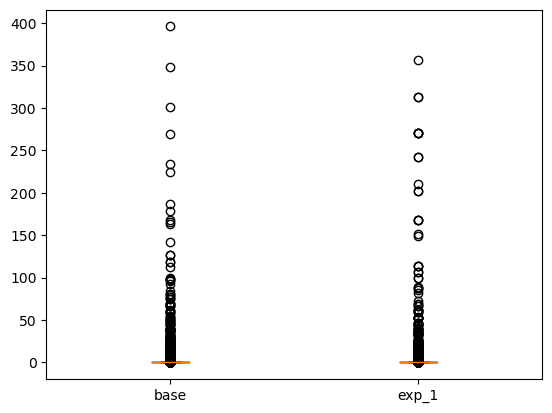

p_value= 0.14364413351769068  ОСТАВЛЯЕМ H0


In [264]:
df1 = df_main[(df_main['preset_group'] == 'base') &
              (df_main['language_group'] == 'android_turk') &
              (df_main['ad_rewarded_starts']<500)]['ad_rewarded_starts']   

df2 = df_main[(df_main['preset_group'] == 'exp_1') & (df_main['language_group'] == 'android_turk')]['ad_rewarded_starts']       



s, p_value = stats.ttest_ind(df1,df2)
            
            
plt.boxplot([df1, df2])
plt.xticks([1, 2], ['base', 'exp_1'])
plt.show()
            
if p_value < alpha:
     print('p_value= '+str(p_value)+'  ОТКЛОНЯЕМ H0')
else:
     print('p_value= '+str(p_value)+'  ОСТАВЛЯЕМ H0')
        
# Промежуточный итог 1: Для турецкого и французского сегментов как увеличение, так и уменьшение 
# принудительных показов рекламы не приводит к 
# статистически значимым результатам в части числа просмотров рекламы за награду


In [265]:
# -----------------------------ИТОГИ И ВЫВОДЫ-----------------------------------------------





#       H03_1 - 
#       H03_2 - 
        
#       H04_1 - 
#       H04_2 - 

#       H05_1 - 
#       H05_2 - 






#    H01_exp1 - Действительно ли уменьшились просмотры рекламы за награду? 

#     Статистически значимый результат наблюдается только для турецкого сегмента. Однако с учетом того (см. выше), что в 
#     данном эксперименте 1 у турецкого датафрейма есть значимые выбросы, то нельзя сказать, что и для турецкого сегмента
#     этот результат статистически значимый. Поэтому окончательный ответ - просмотры рекламы за награду не изменяются.
    
#    H01_exp2 - Действительно ли увеличились просмотры рекламы за награду?
#     Здесь статистически значимых результатов не наблюдается. 
#     Просмотры рекламы за награду не изменяются для обоих сегментов.


#    H02_exp1 - Действительно ли в первом эксперименте повышается количество вернувшихся в игру пользователей через 48ч?

#     Для французского сегмента в эксперименте 1 присутствуют статистически значимые различия.  Для турецкого сегмента
#     статистически значимые различия отсутствуют. Retention 48ч увеличивается для французского сегмента и не изменяется для 
#     турецкого сегмента.

#    H02_exp2 - Действительно ли во втором эксперименте понижается количество вернувшихся в игру пользователей через 48ч?

#     Для обоих сегментов присутствуют статистически значимые различия. Retention 48ч падает для французского 
#     и турецкого сегмента.
    


#    H03_exp1 - Действительно ли повысилась выручка с показа пользователю принудительной рекламы ?

#     Для обоих сегментов присутствуют статистически значимые различия. 
#     Увеличение количества принудительных показов рекламы 
#     приводит к повышению выручки с показа пользователю принудительной рекламы для обоих сегментов 
#     8% и 117,5 у.е. для французского сегмента, и 9,2% и 17,44 у.е. для турецкого сегмента

#    H03_exp2 - Действительно ли понизилась выручка с показа пользователю принудительной рекламы ?

#     Для обоих сегментов присутствуют статистически значимые различия. Уменьшение количества принудительных 
#     показов рекламы 
#     приводит к понижению выручки с показа пользователю принудительной рекламы для обоих сегментов


        
#    H04_exp1 - Действительно ли понизилась выручка с показа пользователю рекламы за награду ?

#     Для обоих сегментов отсутствуют статистически значимые различия. Выручка с показа пользователю рекламы за награду
#     не изменяется.

#    H04_exp2 - Действительно ли повысилась выручка с показа пользователю рекламы за награду ?  

#     Для обоих сегментов отсутствуют статистически значимые различия. Выручка с показа пользователю рекламы за награду
#     увеличивается.     
#     19,7 % и 67,1 у.е. для французского сегмента 27,7% и 8,7 у.е. для турецкого сегмента
    
#    H05_exp1 - Действительно ли увеличилось ?

#     Для обоих сегментов присутствуют статистически значимые различия. Количество принудительных показов рекламы 
#     увеличилось и привело к росту выручки от данного вида рекламы

#    H05_exp2 - Действительно ли уменьшилось количество принудительных показов рекламы? 

#     Для обоих сегментов присутствуют статистически значимые различия. Количество принудительных показов рекламы 
#     уменьшилось и привело к падению выручки от данного вида рекламы

# -------ИТОГ--------------------

# В Первом эксперименте происходит повышение Retention (и его неизменение для турецкого сегмента) и повышение выручки 
# от принудительного показа рекламы и не изменяется выручка от просмотров рекламы за награду. 

# Во Втором эксперименте происходит падение Retention для обоих сегментов, неизменение выручки от принудительного показа 
# рекламы и повышение выручки от просмотров рекламы за награду.

# Несмотря на то, что в процентном соотношении повышение выручки от принудительного показа рекламы меньше, чем от 
# просмотров рекламы за награду во втором эксперименте, в абсолютных цифрах повышение выручки от принудительного показа 
# рекламы больше. 

# Увеличение Retention не может быть следствием увеличения показа принудительной рекламы в эксперименте 1.
# Уменьшение Retention не может быть следствием уменьшения показа принудительной рекламы в эксперименте 2.
# Видимо в экспериментах были какие-то еще модификации приложений.

# Возможно во французском сегменте во втором эксперименте упал Retention, потому что стали сложнее вопросы, т.к. наблюдаются
# статистически значимое уменьшение % правильных ответов пользователя к общему числу ответов (p_value= 0.01748353221361132)
# В турецком сегменте такого не наблюдается.


# Таким образом абсолютная выручка и Retention лучше в Эксперименте 1.

# ВЫВОД: Для турецкого и французского сегмента пользователей имеет смысл обновить приложение до модифицированной версии
#     из Эксперимента 1
    


